In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os.path
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout,GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

import requests
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [ ]:
image_dir = Path('')

In [ ]:

filepath = list(image_dir.glob(r'**/*.jpg'))

label = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

In [ ]:
# Converting the list of file paths to a pandas Series and setting its name as 'Filepath'
filepath = pd.Series(filepath, name='Filepath').astype(str)

# Creating a pandas Series for labels with the name 'Label'
label = pd.Series(label, name='Label')
image_df = pd.concat([filepath, label], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

image_df.head()

,Filepath,Label
0,/content/drive/MyDrive/1/chicken_tikka/5b0d1ce...,chicken_tikka
1,/content/drive/MyDrive/1/aloo_shimla_mirch/7cc...,aloo_shimla_mirch
2,/content/drive/MyDrive/1/chana_masala/5c678ae9...,chana_masala
3,/content/drive/MyDrive/1/aloo_matar/4d14f4450e...,aloo_matar
4,/content/drive/MyDrive/1/chicken_razala/1b1b5d...,chicken_razala


In [ ]:
# splitting dataset into training and testing data
train_df, test_df = train_test_split(image_df, test_size = 0.20,random_state = 43)

In [ ]:
train_df['Label']

789            aloo_methi
929        chicken_razala
1210    daal_baati_churma
840        chak_hao_kheer
82                basundi
              ...        
307        butter_chicken
16                biryani
58                 chikki
277               basundi
255        chak_hao_kheer
Name: Label, Length: 1005, dtype: object

In [ ]:
# ImageDataGenerator for training data
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),  
    batch_size=32,
    color_mode='rgb', 
    class_mode='categorical',  
    shuffle=True,
    seed=42,
    subset='training'  
)
validation_dataset = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='validation'  
)
test_dataset = test_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False  
)

Found 804 validated image filenames belonging to 25 classes.
Found 201 validated image filenames belonging to 25 classes.
Found 252 validated image filenames belonging to 25 classes.


In [ ]:

class_indices = train_dataset.class_indices

print("Class Indices:")
print(class_indices)

Class Indices:
{'adhirasam': 0, 'aloo_gobi': 1, 'aloo_matar': 2, 'aloo_methi': 3, 'aloo_shimla_mirch': 4, 'aloo_tikki': 5, 'anarsa': 6, 'ariselu': 7, 'bandar_laddu': 8, 'basundi': 9, 'bhatura': 10, 'bhindi_masala': 11, 'biryani': 12, 'boondi': 13, 'butter_chicken': 14, 'chak_hao_kheer': 15, 'cham_cham': 16, 'chana_masala': 17, 'chapati': 18, 'chhena_kheeri': 19, 'chicken_razala': 20, 'chicken_tikka': 21, 'chicken_tikka_masala': 22, 'chikki': 23, 'daal_baati_churma': 24}


In [ ]:
index_to_class = {v: k for k, v in class_indices.items()}
print("Index to Class Mapping:")
print(index_to_class)

Index to Class Mapping:
{0: 'adhirasam', 1: 'aloo_gobi', 2: 'aloo_matar', 3: 'aloo_methi', 4: 'aloo_shimla_mirch', 5: 'aloo_tikki', 6: 'anarsa', 7: 'ariselu', 8: 'bandar_laddu', 9: 'basundi', 10: 'bhatura', 11: 'bhindi_masala', 12: 'biryani', 13: 'boondi', 14: 'butter_chicken', 15: 'chak_hao_kheer', 16: 'cham_cham', 17: 'chana_masala', 18: 'chapati', 19: 'chhena_kheeri', 20: 'chicken_razala', 21: 'chicken_tikka', 22: 'chicken_tikka_masala', 23: 'chikki', 24: 'daal_baati_churma'}


In [ ]:
# Load the pre-trained VGG19 model (excluding the top)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create your custom model on top of the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  
x = Dense(256, activation='relu')(x) 
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(25, activation='softmax')(x)  

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(train_dataset, validation_data = validation_dataset, epochs = 30)

Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 3.6354 - accuracy: 0.0485
Epoch 1: val_loss improved from inf to 3.57652, saving model to best_model_3class.hdf5
26/26 [==============================] - 38s 839ms/step - loss: 3.6354 - accuracy: 0.0485 - val_loss: 3.5765 - val_accuracy: 0.0398
Epoch 2/30
26/26 [==============================] - ETA: 0s - loss: 3.6351 - accuracy: 0.0398
Epoch 2: val_loss improved from 3.57652 to 3.53262, saving model to best_model_3class.hdf5
26/26 [==============================] - 21s 786ms/step - loss: 3.6351 - accuracy: 0.0398 - val_loss: 3.5326 - val_accuracy: 0.0498
Epoch 3/30
26/26 [==============================] - ETA: 0s - loss: 3.5840 - accuracy: 0.0361
Epoch 3: val_loss improved from 3.53262 to 3.48939, saving model to best_model_3class.hdf5
26/26 [==============================] - 21s 796ms/step - loss: 3.5840 - accuracy: 0.0361 - val_loss: 3.4894 - val_accuracy: 0.0498
Epoch 4/30
26/26 [==============================] - E

KeyboardInterrupt: 

In [ ]:
# saving model in the working dir
model.save('/content/drive/MyDrive/f1')

In [ ]:
# Testing saved model
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/model-mobilenet-RMSprop0.0002-008-0.995584-0.711503")

Text(0.5, 1.0, 'Training and Validation Accuracy')

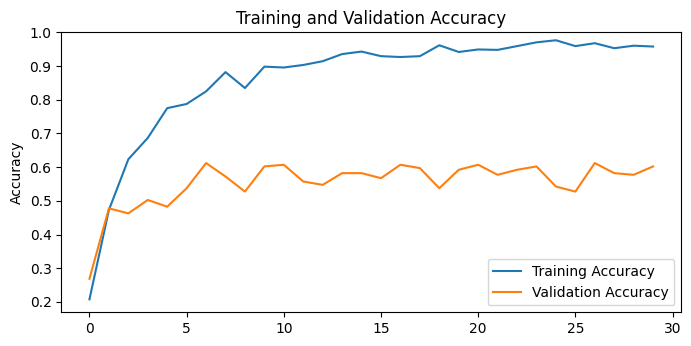

In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

In [ ]:
loss, accuracy = loaded_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

8/8 [==============================] - 74s 10s/step - loss: 1.8326 - accuracy: 0.6270
Test accuracy : 0.6269841194152832


1/1 [==============================] - 0s 50ms/step


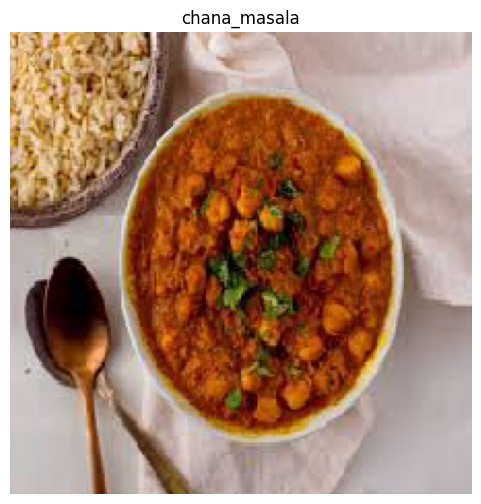

In [ ]:
# making prediction using the trained model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from tensorflow.keras.models import load_model

# load model
loaded_model = load_model("/content/drive/MyDrive/model-mobilenet-RMSprop0.0002-008-0.995584-0.711503")

# image
img_path = '/content/drive/MyDrive/1/chana_masala/22f9414273.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

# showing image and prediciton
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(index_to_class[predicted_class_index])
plt.axis('off')
plt.show()